## Balance Scale Weight & Distance Database

Source: http://archive.ics.uci.edu/ml/datasets/Balance+Scale
1. Title: Balance Scale Weight & Distance Database

2. Source Information: 
    (a) Source: Generated to model psychological experiments reported
		by Siegler, R. S. (1976).  Three Aspects of Cognitive
		Development.  Cognitive Psychology, 8, 481-520.
    (b) Donor: Tim Hume (hume@ics.uci.edu)
    (c) Date: 22 April 1994

3. Past Usage: (possibly different formats of this data)
   - Publications
	1. Klahr, D., & Siegler, R.S. (1978).  The Representation of
	   Children's Knowledge.  In H. W. Reese & L. P. Lipsitt (Eds.),
	   Advances in Child Development and Behavior, pp. 61-116.  New
	   York: Academic Press 
	2. Langley,P. (1987).  A General Theory of Discrimination
	   Learning.  In D. Klahr, P. Langley, & R. Neches (Eds.),
	   Production System Models of Learning and Development, pp.
	   99-161. Cambridge, MA: MIT Press
	3. Newell, A. (1990).  Unified Theories of Cognition.
	   Cambridge, MA: Harvard University Press
	4. McClelland, J.L. (1988).  Parallel Distibuted Processing:
	   Implications for Cognition and Development.  Technical
	   Report AIP-47, Department of Psychology, Carnegie-Mellon
	   University 
	5. Shultz, T., Mareschal, D., & Schmidt, W. (1994).  Modeling
	   Cognitive Development on Balance Scale Phenomena. Machine
	   Learning, Vol. 16, pp. 59-88.

4. Relevant Information: 
	This data set was generated to model psychological
	experimental results.  Each example is classified as having the
	balance scale tip to the right, tip to the left, or be
	balanced.  The attributes are the left weight, the left
	distance, the right weight, and the right distance.  The
	correct way to find the class is the greater of 
	(left-distance * left-weight) and (right-distance *
	right-weight).  If they are equal, it is balanced.

5. Number of Instances: 625 (49 balanced, 288 left, 288 right)

6. Number of Attributes: 4 (numeric) + class name = 5

7. Attribute Information:
	1. Class Name: 3 (L, B, R) - <strong> target variable</strong>
	2. Left-Weight: 5 (1, 2, 3, 4, 5)
	3. Left-Distance: 5 (1, 2, 3, 4, 5)
	4. Right-Weight: 5 (1, 2, 3, 4, 5)
	5. Right-Distance: 5 (1, 2, 3, 4, 5)

8. Missing Attribute Values: 
	none

9. Class Distribution: 
   1. 46.08 percent are L
   2. 07.84 percent are B
   3. 46.08 percent are R

In [69]:
from io import StringIO
from IPython.display import Image

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pydotplus

In [59]:
data = pd.read_csv('balance.csv')

In [60]:
data = data.dropna()
data.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [61]:
# Converting string classes to int
data['Class Name'] = data['Class Name'].replace({'L':-1, 'R': 1, 'B': 0})

In [62]:
X, y = data[['Left-Weight', 'Left-Distance', 'Right-Weight',
       'Right-Distance']], data[['Class Name']]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [64]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(375, 4) (250, 4)
(375, 1) (250, 1)


Shapes are equal so the the classificator can be used

In [65]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [66]:
confusion_matrix(y_test, y_predicted)

array([[97, 14,  3],
       [11,  0, 11],
       [ 7, 15, 92]])

In [67]:
accuracy_score(y_test, y_predicted)

0.75600000000000001

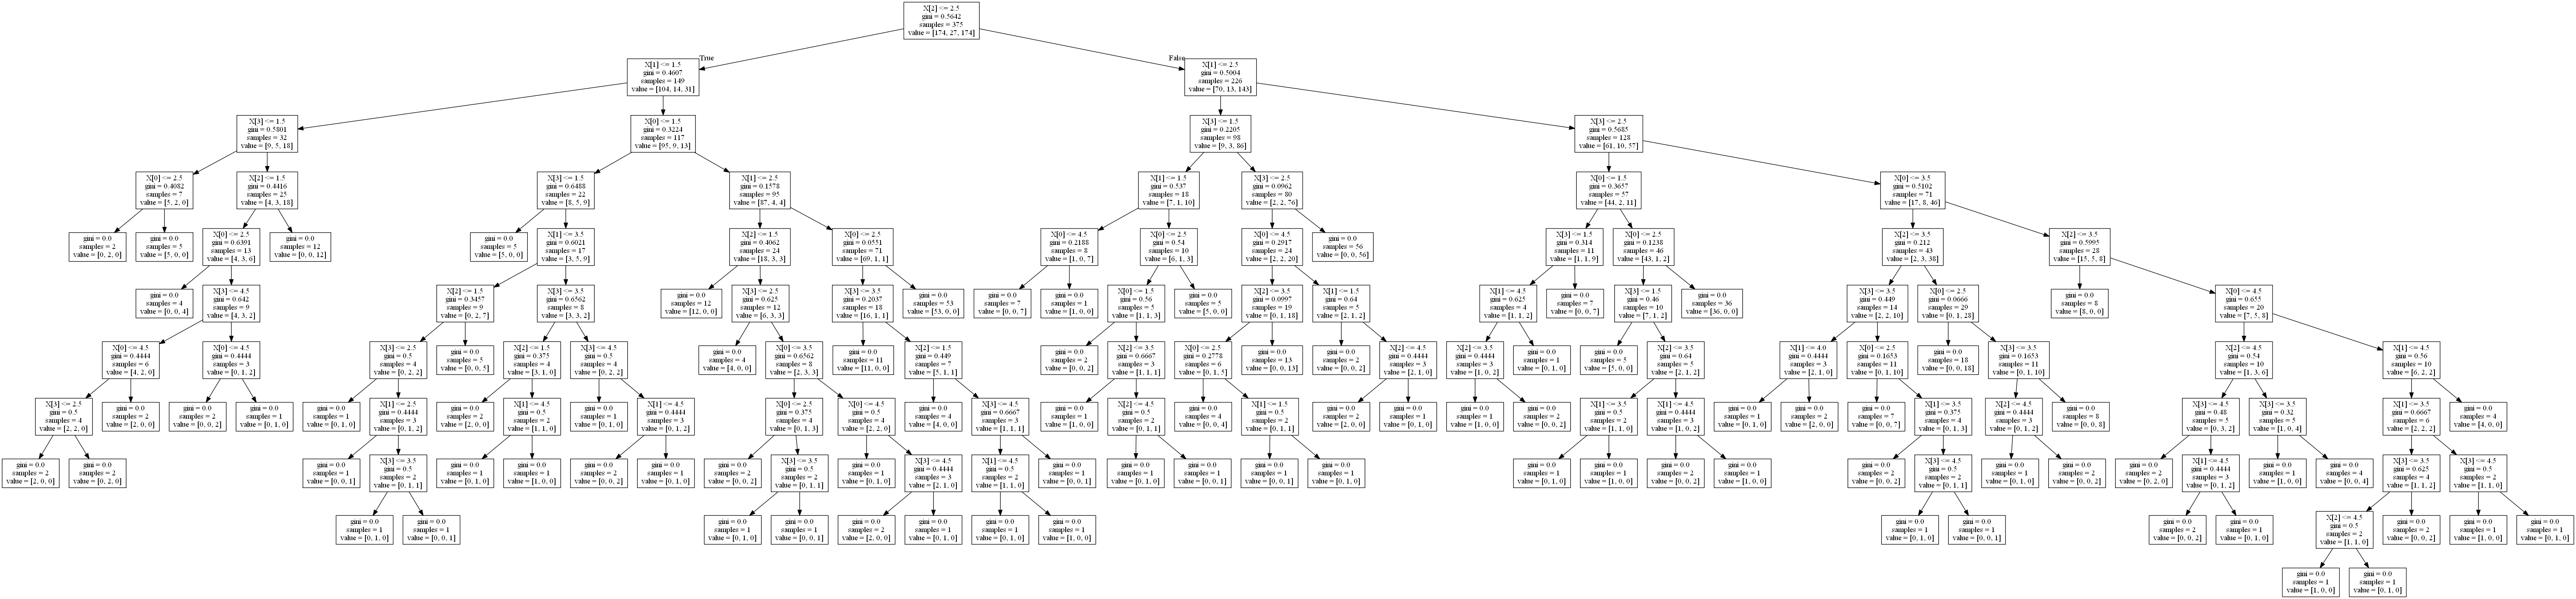

In [68]:
out = StringIO()
tree.export_graphviz(clf, out_file=out)
graph = pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

As a result, we can see a complex tree which describes dependance between class name and weights with distances